### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



## Combinar dataframes

### Subtask:
Unir los cuatro DataFrames (`tienda`, `tienda2`, `tienda3`, `tienda4`) en un solo DataFrame para facilitar el análisis conjunto.


In [3]:
df_list = [tienda, tienda2, tienda3, tienda4]
df_combined = pd.concat(df_list)
display(df_combined.head())

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


## Limpieza de datos


In [4]:
print("Missing values per column:")
print(df_combined.isnull().sum())

print("\nNumber of duplicate rows:")
print(df_combined.duplicated().sum())

Missing values per column:
Producto                  0
Categoría del Producto    0
Precio                    0
Costo de envío            0
Fecha de Compra           0
Vendedor                  0
Lugar de Compra           0
Calificación              0
Método de pago            0
Cantidad de cuotas        0
lat                       0
lon                       0
dtype: int64

Number of duplicate rows:
0


## Conversión de tipos de datos


In [5]:
df_combined['Fecha de Compra'] = pd.to_datetime(df_combined['Fecha de Compra'], format='%d/%m/%Y')
df_combined['Precio'] = pd.to_numeric(df_combined['Precio'], errors='coerce').fillna(0)
df_combined['Costo de envío'] = pd.to_numeric(df_combined['Costo de envío'], errors='coerce').fillna(0)
print(df_combined.dtypes)

Producto                          object
Categoría del Producto            object
Precio                           float64
Costo de envío                   float64
Fecha de Compra           datetime64[ns]
Vendedor                          object
Lugar de Compra                   object
Calificación                       int64
Método de pago                    object
Cantidad de cuotas                 int64
lat                              float64
lon                              float64
dtype: object


# 2. Ventas por categoría

In [6]:
display(df_combined.head())
df_combined.info()
display(df_combined.describe())
categorical_cols = ['Categoría del Producto', 'Vendedor', 'Lugar de Compra', 'Método de pago']
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df_combined[col].value_counts())

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


<class 'pandas.core.frame.DataFrame'>
Index: 9435 entries, 0 to 2357
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Producto                9435 non-null   object        
 1   Categoría del Producto  9435 non-null   object        
 2   Precio                  9435 non-null   float64       
 3   Costo de envío          9435 non-null   float64       
 4   Fecha de Compra         9435 non-null   datetime64[ns]
 5   Vendedor                9435 non-null   object        
 6   Lugar de Compra         9435 non-null   object        
 7   Calificación            9435 non-null   int64         
 8   Método de pago          9435 non-null   object        
 9   Cantidad de cuotas      9435 non-null   int64         
 10  lat                     9435 non-null   float64       
 11  lon                     9435 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)

,Precio,Costo de envío,Fecha de Compra,Calificación,Cantidad de cuotas,lat,lon
count,9.435000e+03,9435.000000,9435,9435.000000,9435.000000,9435.000000,9435.000000
mean,4.667323e+05,24875.145734,2021-08-16 07:36:48.076311808,4.014520,2.927398,5.428909,-74.760108
min,7.600000e+03,0.000000,2020-01-01 00:00:00,1.000000,1.000000,-4.215280,-77.281110
25%,5.520000e+04,3000.000000,2020-10-27 00:00:00,3.000000,1.000000,4.609710,-75.563590
50%,2.215000e+05,11700.000000,2021-08-22 00:00:00,5.000000,1.000000,4.609710,-74.199040
75%,6.633000e+05,34900.000000,2022-06-04 12:00:00,5.000000,4.000000,6.251840,-74.081750
max,2.977000e+06,162500.000000,2023-03-31 00:00:00,5.000000,24.000000,11.544440,-67.923900
std,5.903207e+05,31480.036346,NaN,1.390518,2.802776,2.355663,1.207155



Value counts for Categoría del Producto:
Categoría del Producto
Muebles                    1886
Electrónicos               1772
Juguetes                   1290
Electrodomésticos          1149
Deportes y diversión       1113
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
Name: count, dtype: int64

Value counts for Vendedor:
Vendedor
Izabela de León    744
Felipe Santos      701
Juan Fernandez     694
Ángel Rodriguez    684
Blanca Ramirez     679
Maria Alfonso      679
Juliana Costa      677
Lucas Olivera      674
Camila Rivera      667
Mariana Herrera    656
Pedro Gomez        655
Beatriz Morales    650
Santiago Silva     650
Rafael Acosta      625
Name: count, dtype: int64

Value counts for Lugar de Compra:
Lugar de Compra
Bogotá           3943
Medellín         2314
Cali             1007
Pereira           517
Barranquilla      310
Cartagena         242
Cúcuta            186
Bucaramanga       181
Riohacha          163
Santa Marta       1

# 3. Calificación promedio de la tienda


## Análisis de facturación


In [ ]:
df_combined['Total_Facturación'] = df_combined['Precio'] + df_combined['Costo de envío']

total_facturation_all_stores = df_combined['Total_Facturación'].sum()
average_facturation_all_stores = df_combined['Total_Facturación'].mean()

print(f"Total facturation across all stores: {total_facturation_all_stores:,.2f}")
print(f"Average facturation across all stores: {average_facturation_all_stores:,.2f}")

facturation_by_store = df_combined.groupby('Lugar de Compra')['Total_Facturación'].agg(['sum', 'mean']).reset_index()
facturation_by_store = facturation_by_store.rename(columns={'sum': 'Total_Facturación_Tienda', 'mean': 'Promedio_Facturación_Tienda'})
print("\nFacturation by store location:")
display(facturation_by_store)

df_combined['Año_Mes'] = df_combined['Fecha de Compra'].dt.to_period('M')

facturation_over_time = df_combined.groupby('Año_Mes')['Total_Facturación'].sum().reset_index()
facturation_over_time['Año_Mes'] = facturation_over_time['Año_Mes'].astype(str) # Convert Period to string for display
print("\nFacturation evolution over time (monthly):")
display(facturation_over_time)

Total facturation across all stores: 4,638,316,200.00
Average facturation across all stores: 491,607.44

Facturation by store location:


,Lugar de Compra,Total_Facturación_Tienda,Promedio_Facturación_Tienda
0,Armenia,1.288320e+07,460114.285714
1,Barranquilla,1.390751e+08,448629.354839
2,Bogotá,1.911588e+09,484805.554147
3,Bucaramanga,9.542230e+07,527195.027624
4,Cali,5.334400e+08,529731.876862
5,Cartagena,1.078552e+08,445682.644628
6,Cúcuta,1.046882e+08,562839.784946
7,Inírida,8.515700e+06,608264.285714
8,Leticia,7.074500e+07,498204.225352
9,Manizales,2.039080e+07,497336.585366



Facturation evolution over time (monthly):


,Año_Mes,Total_Facturación
0,2020-01,113055400.0
1,2020-02,113708800.0
2,2020-03,127030500.0
3,2020-04,143377600.0
4,2020-05,128661000.0
5,2020-06,101800400.0
6,2020-07,125539200.0
7,2020-08,117641200.0
8,2020-09,122419200.0
9,2020-10,95457500.0


# 4. Productos más y menos vendidos

## Análisis de ventas por categoría

In [ ]:
category_facturation = df_combined.groupby('Categoría del Producto')['Total_Facturación'].sum().reset_index()

most_sold_categories = category_facturation.sort_values(by='Total_Facturación', ascending=False)
least_sold_categories = category_facturation.sort_values(by='Total_Facturación', ascending=True)

total_facturation_all_categories = category_facturation['Total_Facturación'].sum()
category_facturation['Contribución (%)'] = (category_facturation['Total_Facturación'] / total_facturation_all_categories) * 100

print("Most sold categories by total facturation:")
display(most_sold_categories.head())

print("\nLeast sold categories by total facturation:")
display(least_sold_categories.head())

print("\nAll categories with their total facturation and percentage contribution:")
display(category_facturation.sort_values(by='Total_Facturación', ascending=False))

Most sold categories by total facturation:


,Categoría del Producto,Total_Facturación
3,Electrónicos,1.749039e+09
2,Electrodomésticos,1.395147e+09
7,Muebles,7.981114e+08
4,Instrumentos musicales,3.672769e+08
1,Deportes y diversión,1.506693e+08



Least sold categories by total facturation:


,Categoría del Producto,Total_Facturación
6,Libros,39756000.0
0,Artículos para el hogar,60690900.0
5,Juguetes,77625700.0
1,Deportes y diversión,150669300.0
4,Instrumentos musicales,367276900.0



All categories with their total facturation and percentage contribution:


,Categoría del Producto,Total_Facturación,Contribución (%)
3,Electrónicos,1.749039e+09,37.708481
2,Electrodomésticos,1.395147e+09,30.078747
7,Muebles,7.981114e+08,17.206921
4,Instrumentos musicales,3.672769e+08,7.918324
1,Deportes y diversión,1.506693e+08,3.248362
5,Juguetes,7.762570e+07,1.673575
0,Artículos para el hogar,6.069090e+07,1.308468
6,Libros,3.975600e+07,0.857121


# 5. Envío promedio por tienda

## Análisis de calificación promedio

In [ ]:
average_rating_by_store = df_combined.groupby('Lugar de Compra')['Calificación'].mean().reset_index()
display(average_rating_by_store)

average_rating_by_store_payment = df_combined.groupby(['Lugar de Compra', 'Método de pago'])['Calificación'].mean().reset_index()
display(average_rating_by_store_payment)

,Lugar de Compra,Calificación
0,Armenia,3.464286
1,Barranquilla,3.803226
2,Bogotá,4.113619
3,Bucaramanga,3.977901
4,Cali,4.046673
5,Cartagena,4.020661
6,Cúcuta,3.940860
7,Inírida,3.642857
8,Leticia,3.922535
9,Manizales,3.634146


,Lugar de Compra,Método de pago,Calificación
0,Armenia,Cupón,3.000000
1,Armenia,Nequi,3.750000
2,Armenia,Tarjeta de crédito,3.352941
3,Armenia,Tarjeta de débito,4.000000
4,Barranquilla,Cupón,3.760000
...,...,...,...
65,Valledupar,Tarjeta de crédito,4.200000
66,Villavicencio,Cupón,3.750000
67,Villavicencio,Nequi,3.250000
68,Villavicencio,Tarjeta de crédito,3.950000


## Análisis de productos más y menos vendidos


In [ ]:
product_facturation = df_combined.groupby('Producto')['Total_Facturación'].sum().reset_index()

most_sold_products = product_facturation.sort_values(by='Total_Facturación', ascending=False)
least_sold_products = product_facturation.sort_values(by='Total_Facturación', ascending=True)

print("Top 10 most sold products overall:")
display(most_sold_products.head(10))

print("\nTop 10 least sold products overall:")
display(least_sold_products.head(10))

Top 10 most sold products overall:


,Producto,Total_Facturación
48,TV LED UHD 4K,455524500.0
25,Iphone 15,422445600.0
39,Refrigerador,405393000.0
45,Smart TV,305662600.0
28,Lavadora de ropa,255357300.0
29,Lavavajillas,253345200.0
49,Tablet ABXY,230721200.0
40,Secadora de ropa,221432200.0
13,Celular ABXY,166322800.0
7,Batería,155680600.0



Top 10 least sold products overall:


,Producto,Total_Facturación
16,Cubo mágico 8x8,2942000.0
17,Cuerda para saltar,3332400.0
19,Dinosaurio Rex,3370100.0
0,Ajedrez de madera,5424500.0
42,Set de vasos,5946200.0
18,Dashboards con Power BI,6797600.0
9,Bloques de construcción,7131500.0
50,Vaso térmico,8947400.0
15,Cubertería,8979400.0
36,Muñeca bebé,9003500.0


In [ ]:
category_product_facturation = df_combined.groupby(['Categoría del Producto', 'Producto'])['Total_Facturación'].sum().reset_index()

print("Most and least sold product per category:")
for category in category_product_facturation['Categoría del Producto'].unique():
    category_df = category_product_facturation[category_product_facturation['Categoría del Producto'] == category]
    most_sold_in_category = category_df.sort_values(by='Total_Facturación', ascending=False).iloc[0]
    least_sold_in_category = category_df.sort_values(by='Total_Facturación', ascending=True).iloc[0]

    print(f"\nCategory: {category}")
    print(f"  Most sold: {most_sold_in_category['Producto']} ({most_sold_in_category['Total_Facturación']:,.2f})")
    print(f"  Least sold: {least_sold_in_category['Producto']} ({least_sold_in_category['Total_Facturación']:,.2f})")

Most and least sold product per category:

Category: Artículos para el hogar
  Most sold: Set de ollas (32,140,800.00)
  Least sold: Set de vasos (5,946,200.00)

Category: Deportes y diversión
  Most sold: Bicicleta (101,626,000.00)
  Least sold: Cuerda para saltar (3,332,400.00)

Category: Electrodomésticos
  Most sold: Refrigerador (405,393,000.00)
  Least sold: Microondas (121,799,900.00)

Category: Electrónicos
  Most sold: TV LED UHD 4K (455,524,500.00)
  Least sold: Auriculares (17,368,600.00)

Category: Instrumentos musicales
  Most sold: Batería (155,680,600.00)
  Least sold: Pandereta (13,302,600.00)

Category: Juguetes
  Most sold: Juego de mesa (34,175,900.00)
  Least sold: Cubo mágico 8x8 (2,942,000.00)

Category: Libros
  Most sold: Modelado predictivo (13,284,300.00)
  Least sold: Dashboards con Power BI (6,797,600.00)

Category: Muebles
  Most sold: Cama king (143,033,300.00)
  Least sold: Mesa de centro (31,472,900.00)


## Análisis de envío promedio por tienda


In [ ]:
average_shipping_cost_by_store = df_combined.groupby('Lugar de Compra')['Costo de envío'].mean().reset_index()
print("Average shipping cost by store location:")
display(average_shipping_cost_by_store)

Average shipping cost by store location:


,Lugar de Compra,Costo de envío
0,Armenia,22867.857143
1,Barranquilla,22692.258065
2,Bogotá,24532.082171
3,Bucaramanga,26790.055249
4,Cali,26726.812314
5,Cartagena,22638.429752
6,Cúcuta,28597.311828
7,Inírida,30557.142857
8,Leticia,25317.605634
9,Manizales,24948.780488


## Visualización de datos

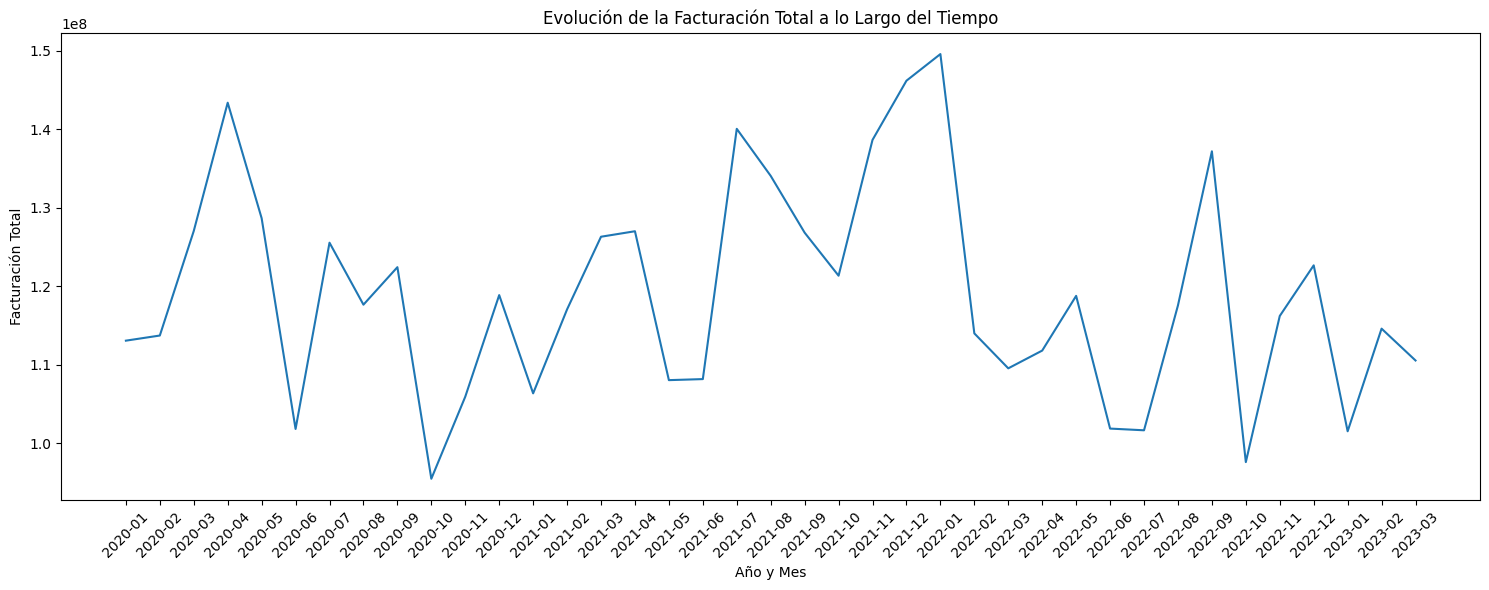

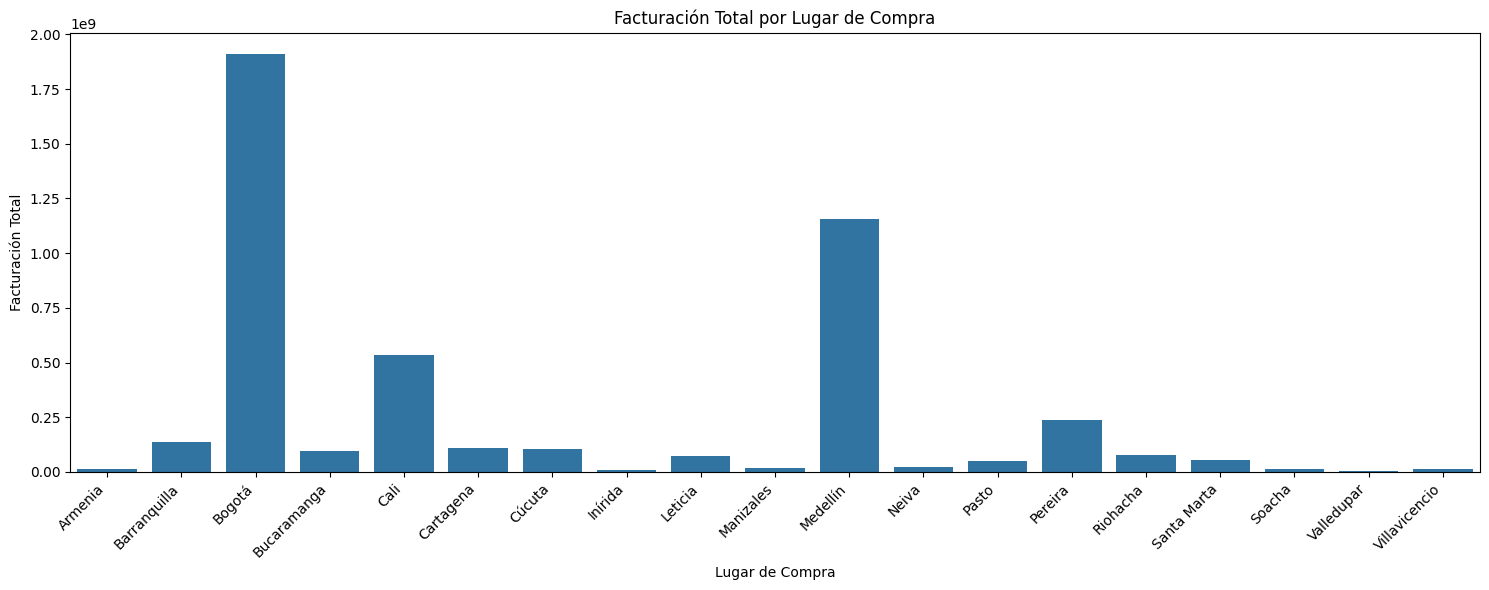

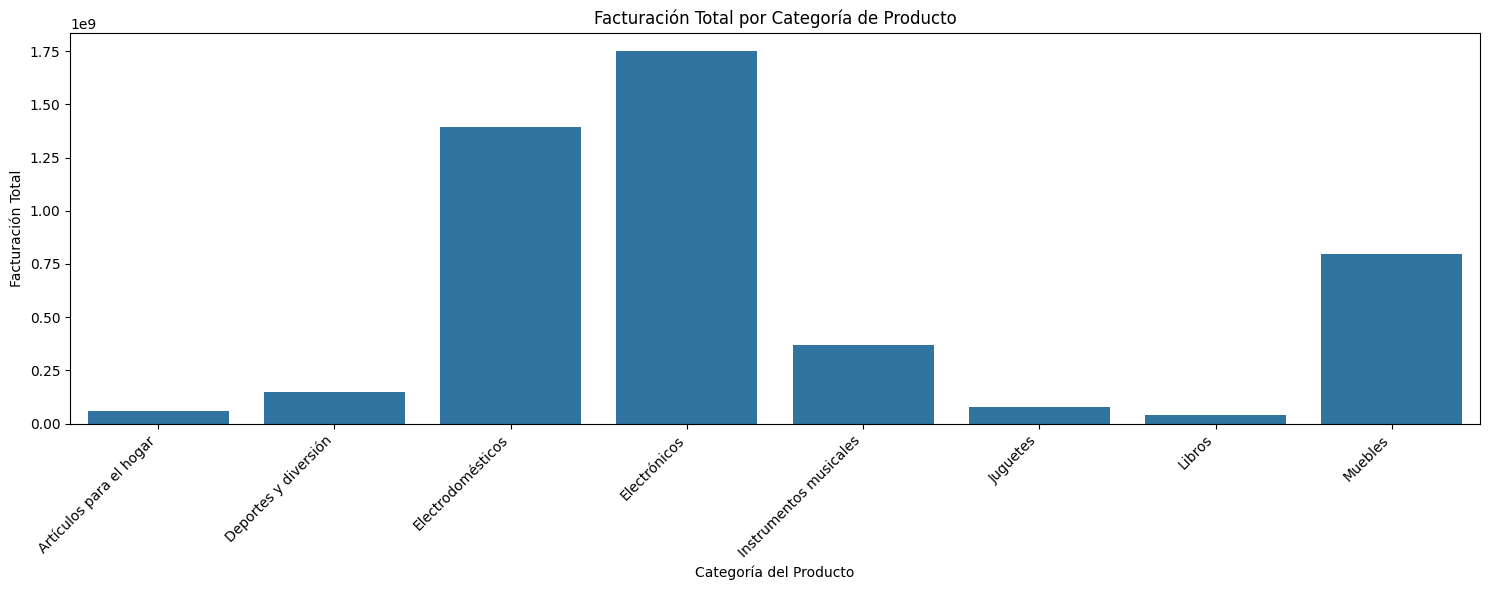

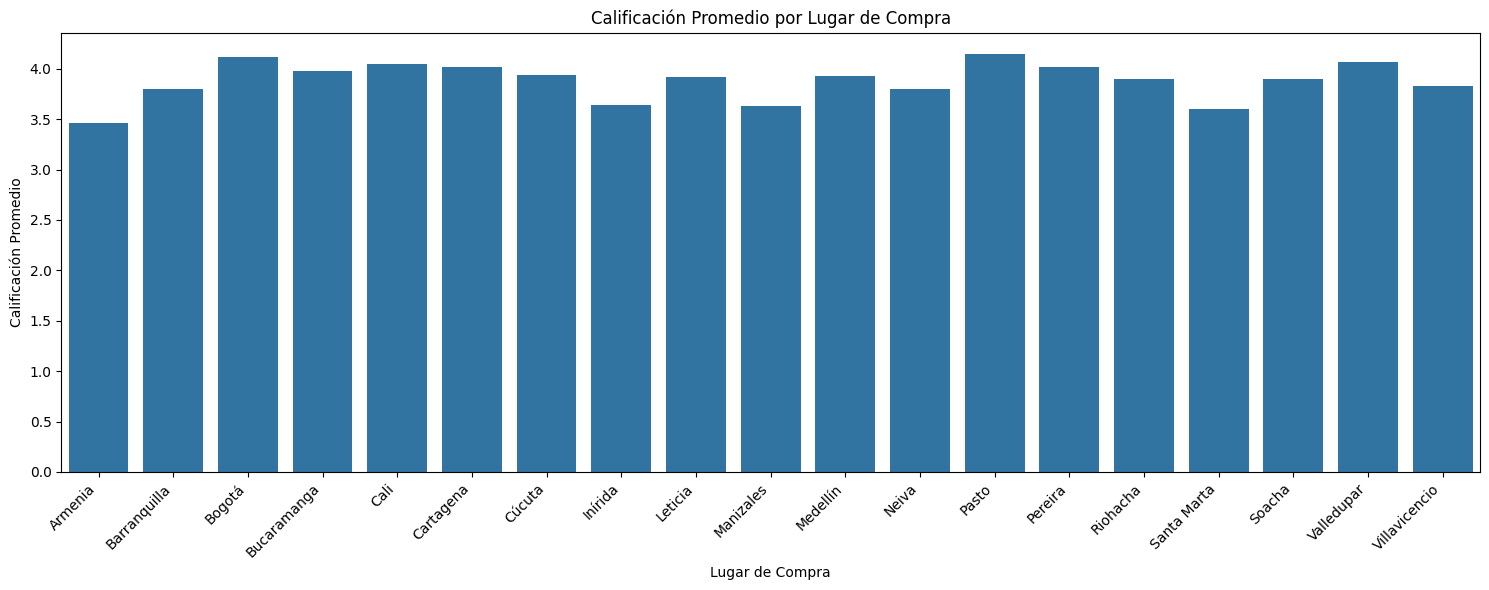

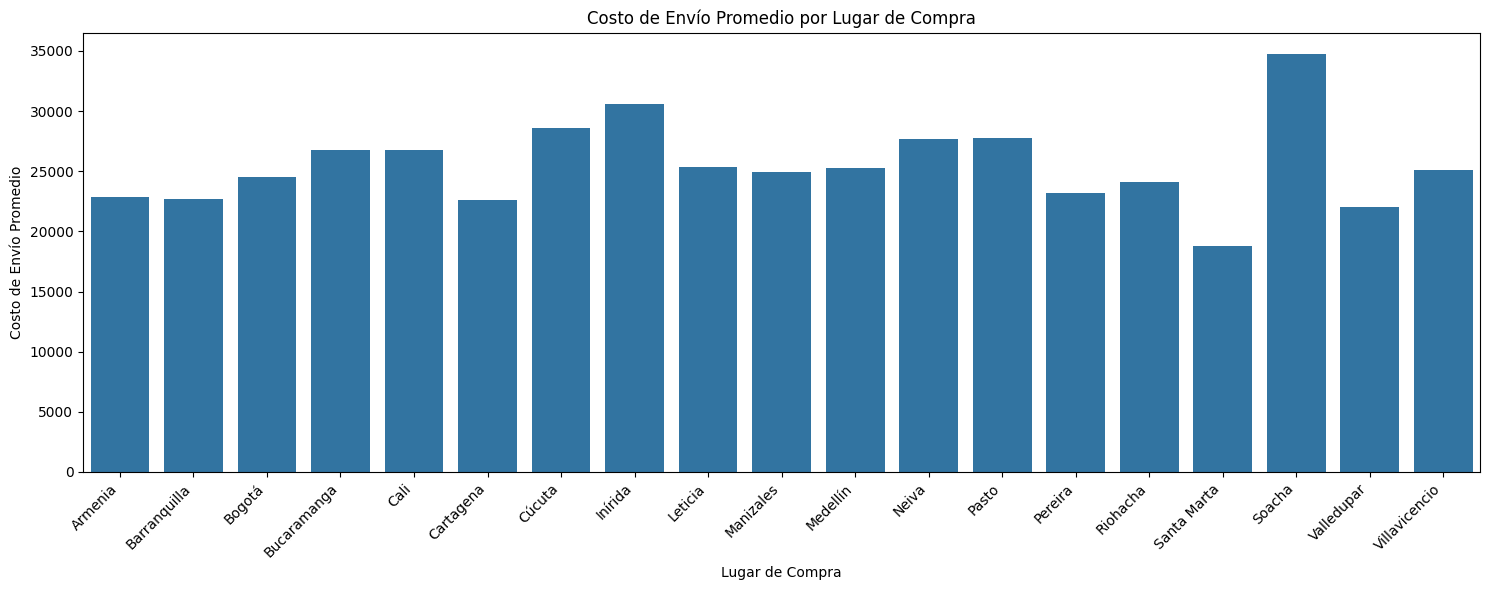

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Facturation over time
plt.figure(figsize=(15, 6))
sns.lineplot(data=facturation_over_time, x='Año_Mes', y='Total_Facturación')
plt.title('Evolución de la Facturación Total a lo Largo del Tiempo')
plt.xlabel('Año y Mes')
plt.ylabel('Facturación Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Total facturation by store
plt.figure(figsize=(15, 6))
sns.barplot(data=facturation_by_store, x='Lugar de Compra', y='Total_Facturación_Tienda')
plt.title('Facturación Total por Lugar de Compra')
plt.xlabel('Lugar de Compra')
plt.ylabel('Facturación Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Total facturation by product category
plt.figure(figsize=(15, 6))
sns.barplot(data=category_facturation, x='Categoría del Producto', y='Total_Facturación')
plt.title('Facturación Total por Categoría de Producto')
plt.xlabel('Categoría del Producto')
plt.ylabel('Facturación Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Average rating by store
plt.figure(figsize=(15, 6))
sns.barplot(data=average_rating_by_store, x='Lugar de Compra', y='Calificación')
plt.title('Calificación Promedio por Lugar de Compra')
plt.xlabel('Lugar de Compra')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Average shipping cost by store
plt.figure(figsize=(15, 6))
sns.barplot(data=average_shipping_cost_by_store, x='Lugar de Compra', y='Costo de envío')
plt.title('Costo de Envío Promedio por Lugar de Compra')
plt.xlabel('Lugar de Compra')
plt.ylabel('Costo de Envío Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()